# Importing Libraries

In [ ]:
import os                   
import cv2  
import h5py
from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# % matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Importing 128x128 numpy image data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
array_128x128_final = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_data_CNN_128*128.npz", allow_pickle=True)

# Train-Test-Split 

In [ ]:
X_train = array_128x128_final['X_train']
y_train = array_128x128_final['y_train']
X_test = array_128x128_final['X_test']
y_test = array_128x128_final['y_test']

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6052, 128, 128, 3)
y_train shape: (6052,)
X_test shape: (1514, 128, 128, 3)
y_test shape: (1514,)


# Plotting single image from numpy data

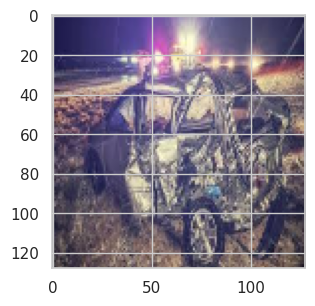

In [ ]:
plt.subplot(121)
img = np.reshape(X_train[1], (128,128,3))
plt.imshow(img)

# Running VGG Deep Learning model (100 Epochs)

##### Load the ImageNet VGG model. Notice we exclude the densely connected layer at the top

##### And then we add the VGG Model directly to our new model

In [ ]:
NUM_EPOCHS = 100
keep_prob = 0.5
vggModel= tf.keras.applications.VGG16( weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model = tf.keras.models.Sequential()
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 1 - keep_prob))
model.add(tf.keras.layers.Dense(17, activation='softmax'))

print (model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 17)                4369      
                                                                 
Total params: 16,816,465
Trainable params: 2,101,777
Non-trainable params: 14,714,688
_________________________________________________________________
None


##### Saving the model during training 

In [ ]:
save_at = "/content/drive/MyDrive/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=['accuracy'])

#  = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test))
H = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[save_best])



Epoch 1/100
190/190 [==============================] - 12s 58ms/step - loss: 0.8678 - accuracy: 0.5165 - val_loss: 0.9908 - val_accuracy: 0.5654
Epoch 2/100
190/190 [==============================] - 10s 54ms/step - loss: 0.8784 - accuracy: 0.5145 - val_loss: 1.2103 - val_accuracy: 0.5694
Epoch 3/100
190/190 [==============================] - 10s 53ms/step - loss: 0.8732 - accuracy: 0.5112 - val_loss: 1.2267 - val_accuracy: 0.5694
Epoch 4/100
190/190 [==============================] - 11s 60ms/step - loss: 0.8687 - accuracy: 0.5121 - val_loss: 1.1577 - val_accuracy: 0.5707
Epoch 5/100
190/190 [==============================] - 11s 57ms/step - loss: 0.8849 - accuracy: 0.5162 - val_loss: 1.1534 - val_accuracy: 0.5812
Epoch 6/100
190/190 [==============================] - 10s 52ms/step - loss: 0.8637 - accuracy: 0.5225 - val_loss: 1.0620 - val_accuracy: 0.5654
Epoch 7/100
190/190 [==============================] - 11s 59ms/step - loss: 0.8479 - accuracy: 0.5301 - val_loss: 1.1145 - val_ac

# Running model on Test Set

In [ ]:
model = load_model('/content/drive/MyDrive/model.hdf5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


Accuracy over the test set: 
  63.28 %


In [ ]:
y_test

array([2, 1, 1, ..., 1, 2, 1])

In [ ]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(y_test)
Targets
Targets.shape

(1514,)

# Predicting damage severity on random images

48/48 [==============================] - 2s 41ms/step


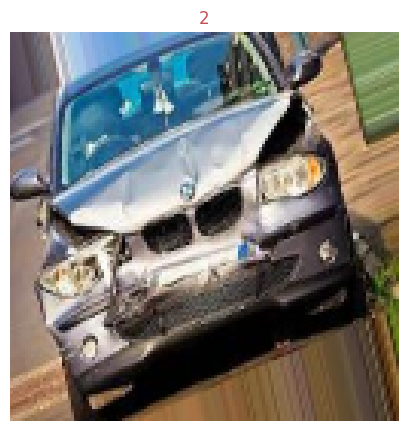

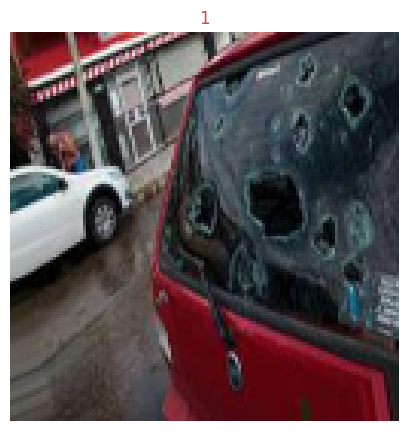

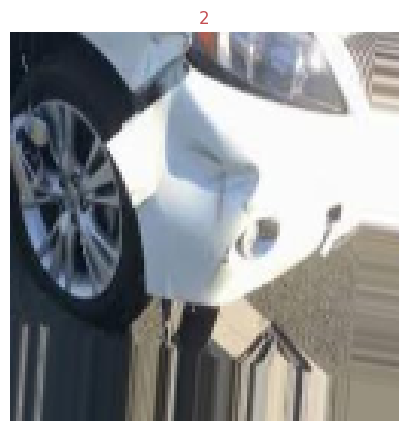

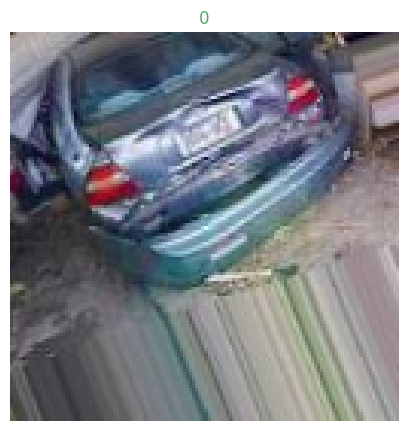

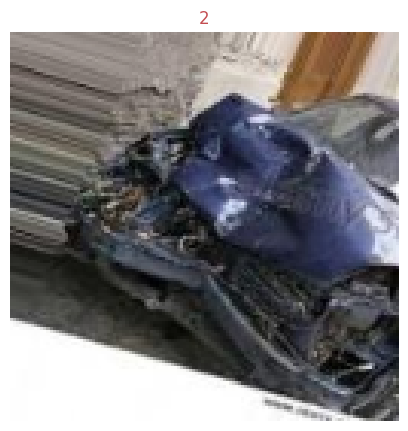

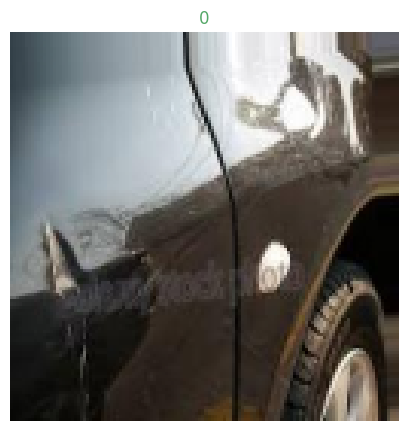

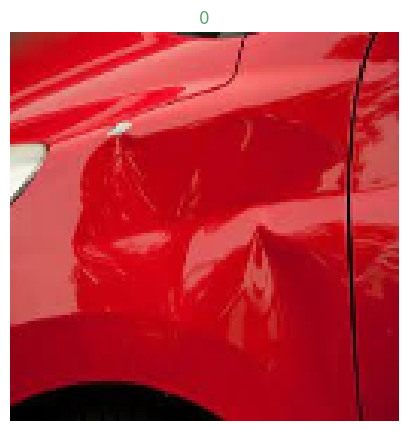

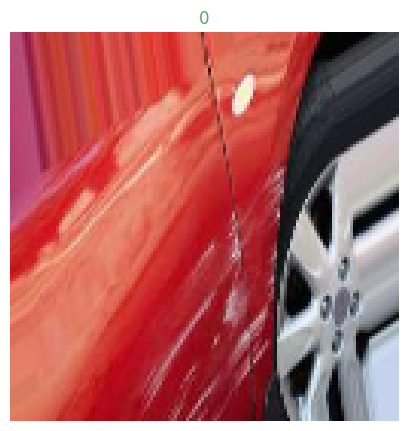

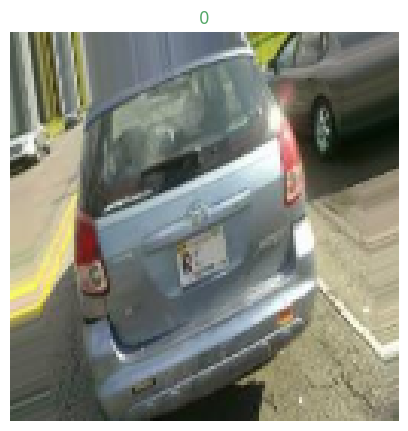

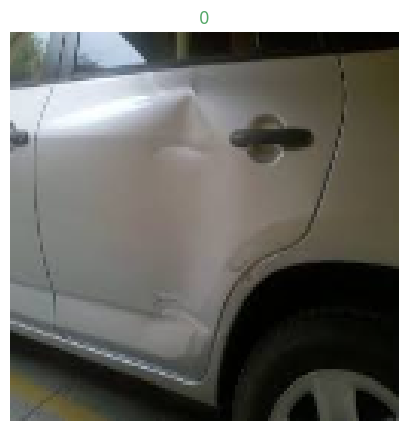

In [ ]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(y_test), 10):
  plt.figure()
  plt.imshow(X_test[rand_num]), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')
